In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
price = pd.read_csv('Brownian.csv')
price['Closing Price'] = price['Closing Price'].astype('int64')
price['Date'] = pd.to_datetime(price['Date'], format='%d/%m/%Y')

# Set the "Date" column as the index
price.set_index('Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2452 entries, 2015-01-05 to 2024-10-25
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Closing Price  2452 non-null   int64
dtypes: int64(1)
memory usage: 38.3 KB


<Axes: xlabel='Date'>

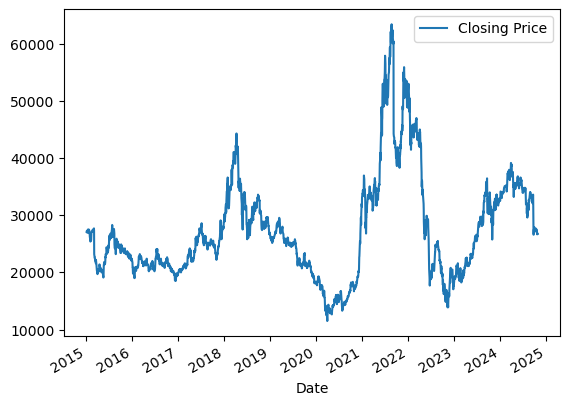

In [3]:
price.info()
price.plot()

In [4]:
 n_t = len(price)
print("Number of Days: ", n_t)

Number of Days:  2452


Text(0, 0.5, 'SSI Stock Price')

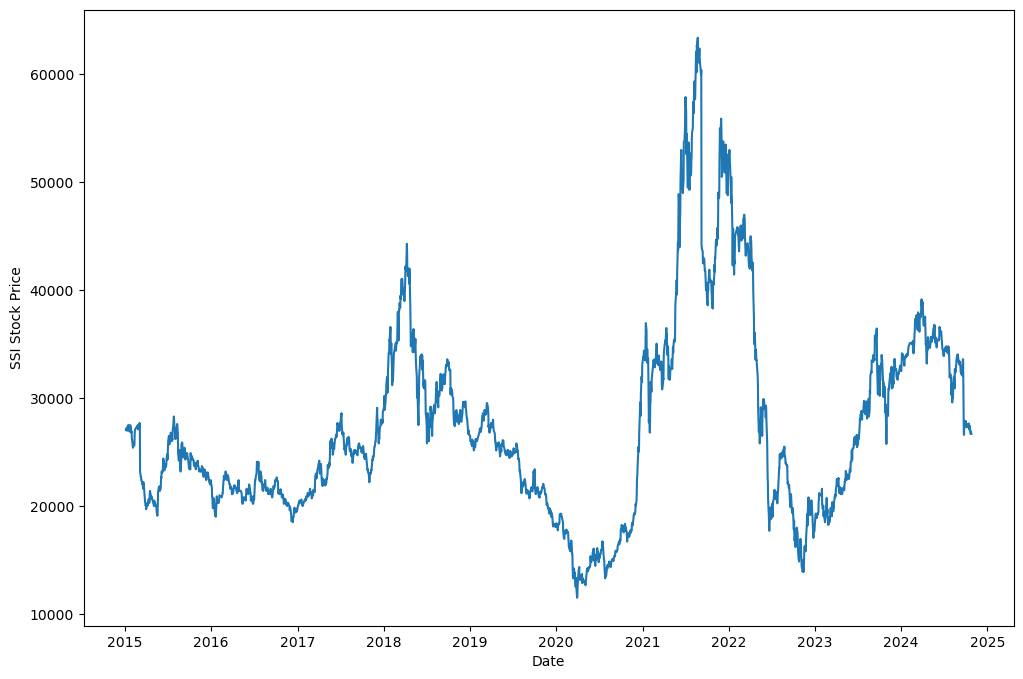

In [5]:
fig = plt.figure(figsize=(12,8))
plt.plot(price['Closing Price'])
plt.xlabel('Date')
plt.ylabel('SSI Stock Price')

In [6]:
#how many steps (days): stepsize = 1 day
n_t = len(price)
print("Number of Days: ", n_t)

#how many paths/realizations
n_mc = 10000

#initialize array S(t) -- container for the MC simulation
St = pd.DataFrame(0.,index=price.index, columns=list(range(1, n_mc+1)))
St.iloc[0] = price['Closing Price'].iloc[0]



Number of Days:  2452


In [7]:
# Calculate daily returns
price['Daily Return'] = price['Closing Price'].pct_change()

# Drop any NaN values resulting from the pct_change operation
price.dropna(inplace=True)

# Calculate mean and standard deviation of daily returns
mean_daily_return = price['Daily Return'].mean()
sigma = price['Daily Return'].std()
daily_volatility=sigma

# Annualize the mean and volatility (assuming 252 trading days per year)
mu = mean_daily_return * 252
annualized_volatility = daily_volatility * np.sqrt(252)

mu=mu
sigma=sigma*10 #do thời gian theo ngày thì data sẽ bị giới hạn biên độ dao động tại tt vnam, nên assume nó biến động gấp x lần

print("Annualized Drift (Mu):", mu)
print("Annualized Volatility:", annualized_volatility)

Annualized Drift (Mu): 0.0776615509590999
Annualized Volatility: 0.39459256479458515


In [8]:
#step size
n_days = 2452  # Số ngày dựa trên dữ liệu thực tế
dt = 1 / n_days  # Step size cho từng ngày trong khoảng thời gian thực tế
print('Daily Vol: ', sigma*np.sqrt(dt))

Daily Vol:  0.00501982288764457


In [9]:
#MC simulation with numpy's random number generator
for i in range (1, n_t):
    dS_2_S = mu*dt + sigma*np.sqrt(dt)*np.random.randn(n_mc) #randn is the normal distribution  number generator
    St.iloc[i] = St.iloc[i-1] + St.iloc[i-1]*dS_2_S

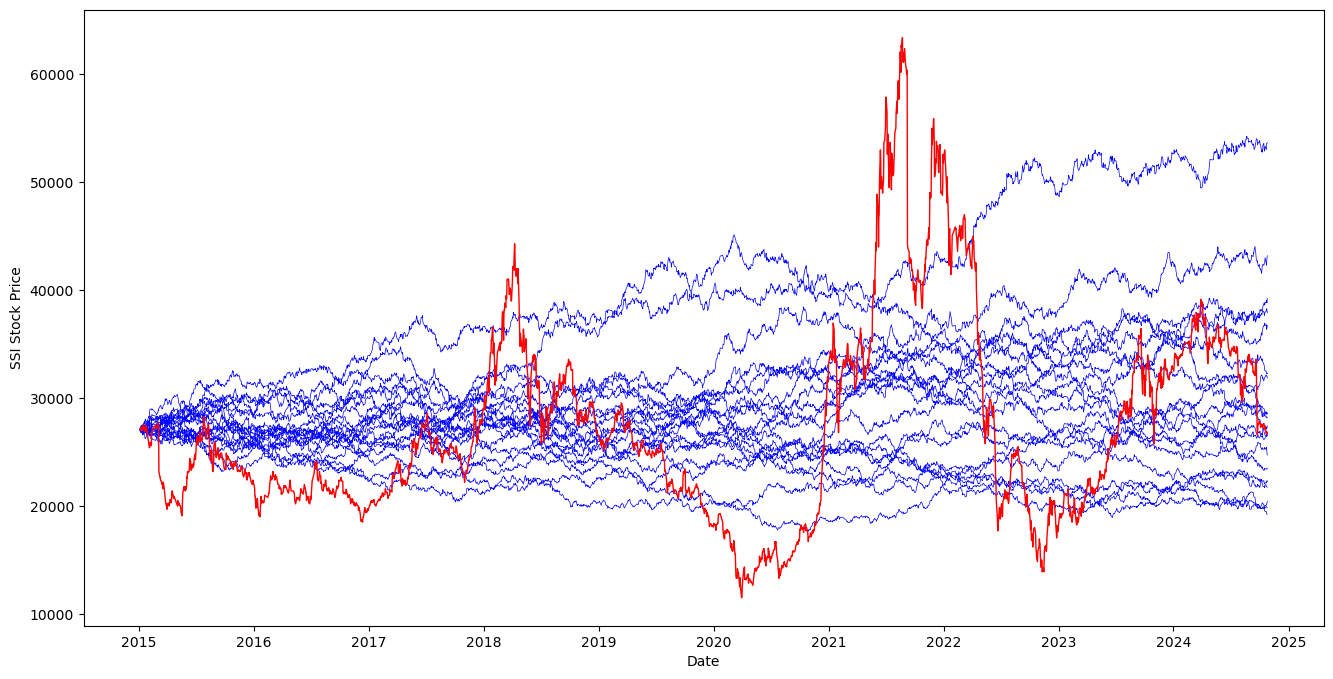

In [10]:
#Visualize
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot(111)

for i in np.random.choice(np.array(range(1,n_mc+1)),size=20):
    axl.plot(St[i], 'b', lw=0.5) # Name columns with numbers to name the path
    plt.xlabel('Date')
    plt.ylabel('SSI Stock Price')
    
axl.plot(price['Closing Price'], 'r', lw=1)
plt.show()

In [11]:
St_mc_mean = St.mean(axis=1)
St_th_mean = price['Closing Price'].iloc[0]*np.exp(mu*np.arange(n_t)/n_t*1.05)
St_th_mean = pd.DataFrame(St_th_mean, index=St_mc_mean.index)

print("Expected Value from MC: ", St_mc_mean.iloc[-1])
print("Theoretical Expected Value: ", St_th_mean.iloc[-1])

Expected Value from MC:  29292.581467322445
Theoretical Expected Value:  0    29401.482552
Name: 2024-10-25 00:00:00, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_14576\148742738.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('MC Mean', 'Theoretical Mean')


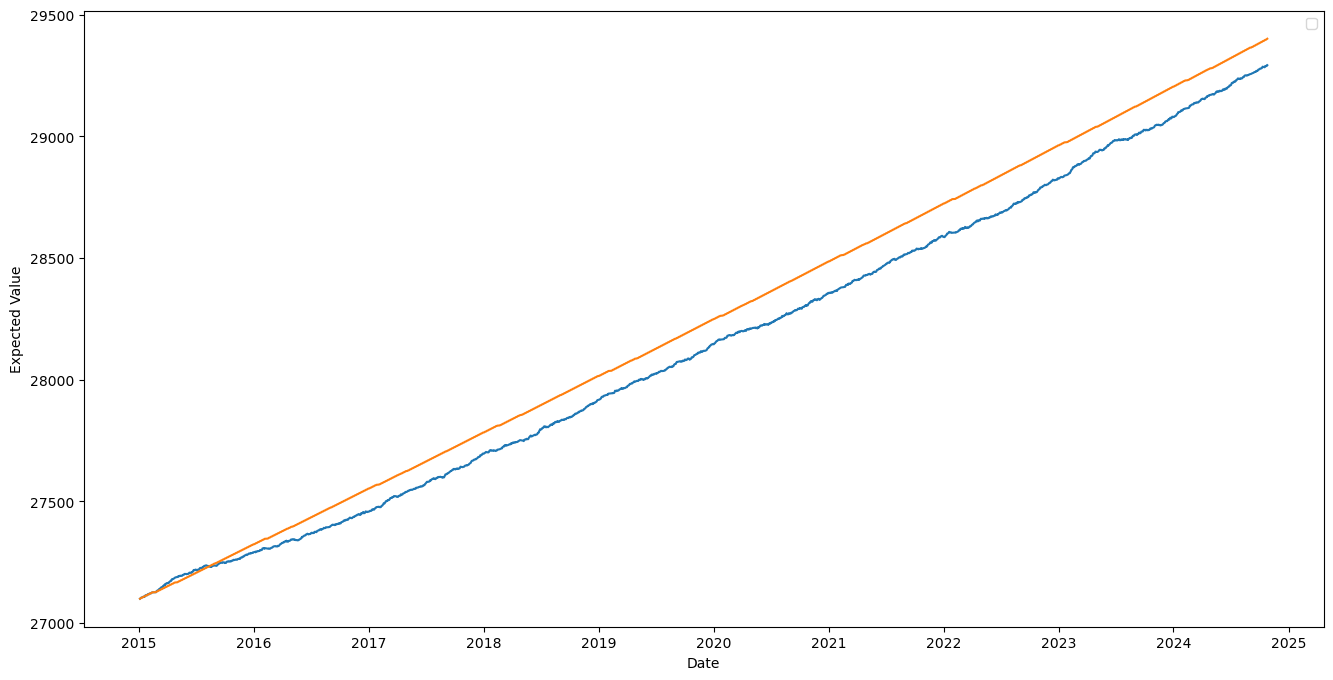

In [12]:
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot(111)
plt.plot(St_mc_mean)
plt.plot(St_th_mean)
plt.xlabel('Date')
plt.ylabel('Expected Value')
plt.legend('MC Mean', 'Theoretical Mean')

Expected Value from MC:  28422.608624250406
Theoretical Expected Value:  0    28396.976978
Name: 2024-10-25 00:00:00, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_14576\1860627727.py:16: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('MC Mean', 'Theoretical Mean')


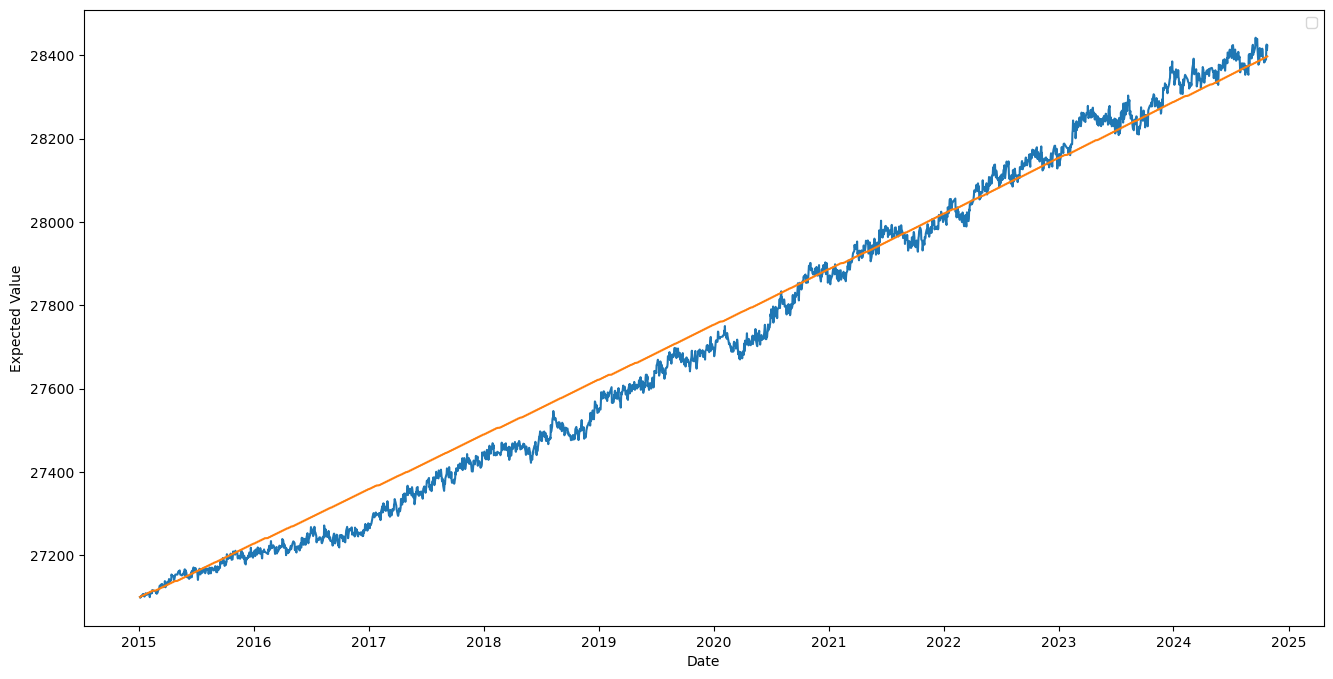

In [13]:
St_mc_median = St.median(axis=1)
St_th_median = price['Closing Price'].iloc[0]*np.exp((mu-0.5*sigma*sigma)*np.arange(n_t)/n_t*1)
St_th_median = pd.DataFrame(St_th_median, index=St_mc_median.index)

print("Expected Value from MC: ", St_mc_median.iloc[-1])
print("Theoretical Expected Value: ", St_th_median.iloc[-1])



fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot(111)
plt.plot(St_mc_median)
plt.plot(St_th_median)
plt.xlabel('Date')
plt.ylabel('Expected Value')
plt.legend('MC Mean', 'Theoretical Mean')

In [14]:
### def gbm_mc(price, n_mc, mu = 0.07877271864123178, sigma=0.2989473387283776):
    #how many steps (days): stepsize = 1 day
    n_t = len(price)
    print("Number of Days: ", n_t)
    #step size
    n_days = 2452  # Số ngày dựa trên dữ liệu thực tế
    dt = 1 / n_days  # Step size cho từng ngày trong khoảng thời gian thực tế
    print('Daily Vol: ', sigma*np.sqrt(dt))
    #how many paths/realizations
    n_mc = 10000

    #initialize array S(t) -- container for the MC simulation
    St = pd.DataFrame(0.,index=price.index, columns=list(range(1, n_mc+1)))
    St.iloc[0] = price['Closing Price'].iloc[0]
    # Calculate daily returns
    price['Daily Return'] = price['Closing Price'].pct_change()

    # Calculate mean and standard deviation of daily returns
    mean_daily_return = price['Daily Return'].mean()
    sigma = price['Daily Return'].std()

    # Annualize the mean and volatility (assuming 252 trading days per year)
    mu = mean_daily_return * 252
    annualized_volatility = daily_volatility * np.sqrt(252)

    mu=mu
    sigma=sigma*12 #do thời gian theo ngày thì data sẽ bị giới hạn biên độ dao động tại tt vnam, nên assume nó biến động gấp x lần

    print("Annualized Drift (Mu):", mu)
    print("Annualized Volatility:", annualized_volatility)
    for i in range (1, n_t):
        dS_2_S = mu*dt + sigma*np.sqrt(dt)*np.random.randn(n_mc) #randn is the normal distribution  number generator
        St.iloc[i] = St.iloc[i-1] + St.iloc[i-1]*dS_2_S
    
    return St


IndentationError: unexpected indent (907457576.py, line 3)

In [ ]:
St = gbm_mc(price, n_mc=20000)